In [7]:
import pandas as pd
import numpy as np
from dowhy import CausalModel
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from econml.dml import CausalForestDML

In [2]:
N = 10000
np.random.seed(0)
X = np.random.randn(N, 2)
Z = np.random.randint(0, 2, (N,))
Y = 0.2 * X[:, 0] + 0.5 * X[:, 1] + 0.3 * Z
print('estimate of E[Y|Z = 1] - E[Y|Z = 0] = ', Y[Z.astype(np.bool)].mean() - Y[~Z.astype(np.bool)].mean())

covariates = ['x0', 'x1']
treatment = 'treatment'
outcome = 'outcome'
label = covariates + [treatment, outcome]
df = pd.DataFrame(np.c_[X, Z, Y], columns=label)
df.head()

estimate of E[Y|Z = 1] - E[Y|Z = 0] =  0.31055284465722865


,x0,x1,treatment,outcome
0,1.764052,0.400157,0.0,0.552889
1,0.978738,2.240893,1.0,1.616194
2,1.867558,-0.977278,1.0,0.184873
3,0.950088,-0.151357,1.0,0.414339
4,-0.103219,0.410599,1.0,0.484655


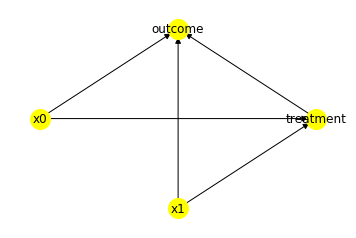

In [3]:
model = CausalModel(data=df, treatment='treatment', outcome='outcome', common_causes=covariates, instruments=None, effect_modifiers=None)
model.view_model()

In [9]:
train_data, test_data = train_test_split(df, test_size=0.2)

X_tr, Z_tr, Y_tr = train_data[covariates], train_data[treatment], train_data[outcome]
causal_forest = CausalForestDML(
    criterion='het',
    n_estimators=10000,
    min_samples_leaf=10,
    max_depth=None,
    max_samples=0.5,  # Q?: なぞ
    discrete_treatment=False,  # Q?: なぞ
    honest=True,  # Q?: Causal Treeを使うのですべてhonestでは？なぜわざわざ指定するオプションがある?
    inference=True,  # Q?: 推論しないなら何すんねん
    cv=10,
    model_t=LassoCV(),
    model_y=LassoCV()
)

causal_forest.fit(Y_tr, Z_tr, X=X_tr, W=None)  # Q?: Wがなぞ

In [10]:
causal_forest.const_marginal_ate(test_data[covariates])